**Linear Regression model from scratch**

## Linear Regression
Linear Regressoin is the most basic and popular algorithm of machine learning. It is supervised machine learning algorithm which is predicted output is real values/continuous. Or, Relationship between input/independent variables and single output/dependent variable. 
We will get linear regression image look like : -
![image](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/800px-Linear_regression.svg.png)
#### Linear Regression has main two type: -
    1. Simple Linear Regression
    2. Multiple Linear Regression
### Simple Linear Regression
A linear line relationship between one input/independent variable(X) and one output/dependent variable(y).

     y = mX + b
Where, y is dependent/target variable; X is input/independent variable; m is slop of regression line; b is y-intercept.
### Multiple Linear Regression
A relationship betweet two or more independent/input variables and one continuous dependent/output variable.
    
  

In [1]:
#load all needed libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
%matplotlib inline

In [2]:
#load data for train and test
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

In [3]:
#view some train data
train.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [4]:
#view some test data
test.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [5]:
#shape of train dataset
train.shape

(700, 2)

In [6]:
#shape of test dataset
test.shape

(300, 2)

### Analysis on train dataset

In [7]:
#check data type of each column
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
x    700 non-null float64
y    699 non-null float64
dtypes: float64(2)
memory usage: 11.0 KB


### Let's check missing values

In [8]:
#check missing values with 'isnull' command 
train.isnull().any()

x    False
y     True
dtype: bool

In [9]:
#count, how many missing value is in this attributes
train['y'].isnull().sum()

1

#### There is 1 missing value available in 'y' column

### **Now, Problem is that how to handle missing values ?**
Solution : For missing values, there is some approach to handle the missing values like:-

    1. Remove Rows With Missing Values
    2. Imputting missing values with Mean, Median or Mode values of the Column
   And, for more infomation [click here](https://machinelearningmastery.com/handle-missing-data-python/)

In [10]:
# Here, I remove Row of with missing value
train = train.dropna()

x    False
y    False
dtype: bool


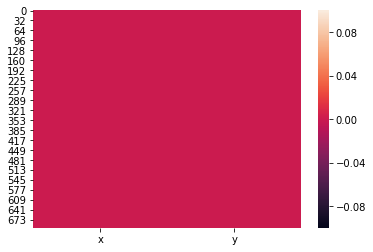

In [11]:
#Now check there is missing value or not
print(train.isnull().any())

#plot
sb.heatmap(train.isnull())
plt.show()

#### Now, there is no any missing values

In [12]:
#describe of data into statical form
train.describe()

,x,y
count,699.000000,699.000000
mean,50.014306,49.939869
std,28.954560,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,100.000000,108.871618


## Visualization of train dataset

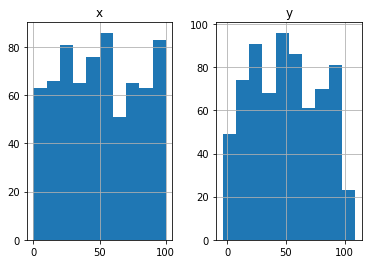

In [13]:
#Histograme od train dataset
train.hist()
plt.show()

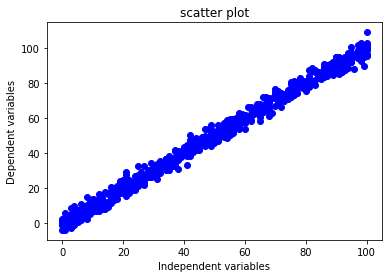

In [14]:
#Scatter plot
plt.scatter(x=train.x, y=train.y, c='blue')
plt.title('scatter plot')
plt.xlabel('Independent variables')
plt.ylabel('Dependent variables')
plt.show()

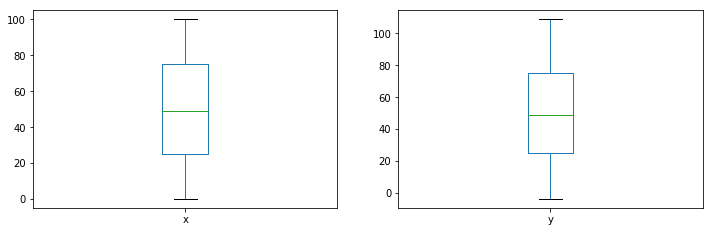

In [15]:
#BoxPlot
train.plot(kind='box', subplots=True, layout=(2, 2), figsize=(12, 8))
plt.show()

### [What is box plot ?](http://whatis.techtarget.com/definition/box-plot)

In [16]:
#Input Variable 
X = train.x.values
#Output Variable
y = train.y.values

 Let's find the slop of regression line(m) and bais(y-intercept). we can find these using diffrente approaches. Like:- Ordinary Least Square approach and Gradient Descent approach.
 
 ## Ordinary Least Square
 Earlier in this we discussed that the relationship between independent(X) variable and dependent(y) variable is know as linear regression.
 
 **Orinary Least Sqaure** - the sum of the squares of the differences between an observation’s actual and estimated values.
![Regression image](https://d1jnx9ba8s6j9r.cloudfront.net/blog/wp-content/uploads/2018/06/Least-Square-Method-2-399x300.png) 
Total error of this model is the sum of all errors of each point. ie.

$$SE=\sum_{i=1}^nDi^2$$

    Di = Distance between line and ith point.
    n = Total number of points
## Let's start Implementation
    1. Calculate Mean and Variance
    2. Calculate Covariance.
    3. Estimate Coefficients.
    4. Make prediction
    5. Evaluating Model with RMSE

### **Calculate Mean and Variance**
Mean of numbers can be calculate as: -

    mean(x) = sum(x) / count(x)
Varience of numbers can be calculate as: -
    
    variance = sum((x - mean(x))^2)



In [17]:
#Calculate mean of list numbers with mean function
def mean(numbers):
    return sum(numbers) / float(len(numbers))

#Calculate varience of list numbers with varience function
def varience(numbers, mean):
    return sum([abs(x-mean)**2 for x in numbers])

In [18]:
X_mean, y_mean = mean(X), mean(y)
X_varience = varience(X, X_mean)
y_varience = varience(y, y_mean)

### **Calculate Covariance**
covariance can describe the relationship between two or more groups of numbers. It is a generalization of correlation. Correlation describes the relationship between two groups of numbers.
 
 we can calculate the covariance between two variables as follows: 
       
       covariance = sum((x(i) - mean(x)) * (y(i) - mean(y)))


In [19]:
#Calculate the covarience of these groups
def covarience(X, X_mean, y, y_mean):
    ln = len(X)
    cov = 0.0
    for i in range(ln):
        cov += ((X[i] - X_mean) * (y[i] - y_mean))
    return cov

### **Estimate Coefficients**
We must estimate two coefficients in simple linear regression. which is m and b.

    m = covarience() / varience()
    b = mean(y) - (m*mean(X))

In [20]:
#Lets estimate with coefficient
def coefficients():
    m = covarience(X, X_mean, y, y_mean) / varience(X, X_mean)
    b = y_mean - (m*X_mean)
    return [m,b]

### **Make prediction**
We have been estimated the coefficients. Now, we can use them to make predictions follows by this eqation: -

       y = mX + b
 

In [21]:
#Let's seprate the test datasets and reshape it
X_test = test['x'].values.reshape(-1, 1)
y_test = test['y'].values.reshape(-1, 1)

In [22]:
# simple_linear_regression() function making here to prediction
def simple_linear_regression():
    prediction = list()
    m, c = coefficients()
    for test in X_test:
        y_pred = m*test[0] + c
        prediction.append(y_pred)
    return prediction

In [23]:
predict = simple_linear_regression()

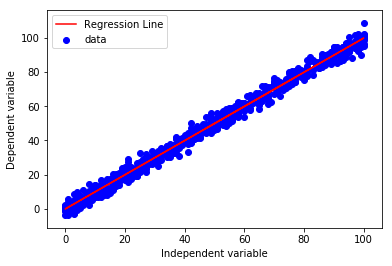

In [24]:
# Ploting Line
plt.plot(X_test, predict, c='red', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, y, label='data', c='blue')

plt.xlabel('Independent variable')
plt.ylabel('Dependent variable')
plt.legend()
plt.show()

### **Evaluating Model with Root Mean Sqare Error**
We need to find how good is our model. There are many methods to evaluate models. Here we will use **Root Mean Sqare Error** and
**Coefficient of Determination(R-Sqaure)**

**Root Mean Sqare Error** is the square root of the sum of all errors divided by the number of values.
![RMSE](https://cdn-images-1.medium.com/max/800/1*SGBsn7WytmYYbuTgDatIpw.gif)
Here yj^ is the ith predicted output values.

**R-Square**: It determines how much of the total variation in Y (dependent variable) is explained by the variation in X (independent variable). Mathematically, it can be written as:-
![R-sqaure](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2017/06/05203905/snip10.png)
The value of R-square is always between 0 and 1, where 0 means that the model does not model explain any variability in the target variable (y) and 1 meaning it explains full variability in the target variable.

#### ** Let's find RMSE with root_mean_sqaure_error funtion below**

In [25]:
def root_mean_sqaure_error():
    rmse = 0.0
    m, c = coefficients()
    for i in range(len(X_test)):
        yhat = m*X_test[i] + c
        rmse += (y_test[i] - yhat)**2
    rmse = np.sqrt(rmse/len(X_test))
    return rmse

In [26]:
#Root Mean Sqare Error
RMSE = root_mean_sqaure_error()
print(RMSE[0])

3.0713062680298298


#### **R-Sqaure with followed by r_sqaure function**

In [27]:
def r_sqaure():
    #sst is the total sum of squares and ssr is the total sum of squares of residuals
    sst = 0
    ssr = 0
    m, c = coefficients()
    for i in range(len(X_test)):
        ypred = m*X_test[i] + c
        ssr += (y_test[i] - ypred)**2
        sst += (y_test[i] - y_mean)**2
    return (1-(ssr/sst))

In [28]:
#R-Sqaure
score = r_sqaure()
print(score[0])

0.9888226846629965


Than you for reach to end, Keep going **Abu Ali**